<a href="https://colab.research.google.com/github/LukichevaPolina/da_methods_labs/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22LAB2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/K_lab_2_data/X_4_3.xlsx'
data_x = pd.read_excel(file_path)
data_x.columns = ['x_' + str(i) for i in range (data_x.shape[1])]
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     199 non-null    float64
 1   x_1     199 non-null    float64
 2   x_2     199 non-null    float64
 3   x_3     199 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [11]:
data_x.head()

,x_0,x_1,x_2,x_3
0,5.925133,0.956640,8.980344,-3.055211
1,6.441260,1.170630,9.370629,-2.929369
2,6.301320,1.160937,9.119830,-2.818510
3,6.400442,1.240521,9.079320,-2.678879
4,6.311495,1.169958,9.113115,-2.801620


In [12]:
file_path = '/content/drive/MyDrive/K_lab_2_data/Y_4_3.xlsx'
data_y = pd.read_excel(file_path)
data_y.columns = ['y_' + str(i) for i in range (data_y.shape[1])]
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_0     199 non-null    float64
 1   y_1     199 non-null    float64
 2   y_2     199 non-null    float64
 3   y_3     199 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [13]:
data_y.head()

,y_0,y_1,y_2,y_3
0,1.896167,1.104732,1.715516,0.802851
1,1.212324,-0.121333,-0.084197,1.043010
2,0.875004,0.906996,1.267052,0.861366
3,0.917798,0.995384,1.071257,1.111678
4,1.236041,-0.157617,0.142423,1.147995


## Подготовка данных
Для каждого набора данных X_4_i и  Y_4_i  выбрать расстояние в R4
(интересно не только евклидово расстояние).
- вычислить матрицу расстояний
- перейти к матрице близостей (similarity matrix) и построить графовую модель данных (полный,
неориентированный, простой взвешенный граф)



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def print_plots(data: pd.DataFrame):
  sns.set_style("whitegrid")
  plt.figure(figsize=(15, 10))
  col_number = len(data.columns)

  # Create subplots: 2 columns (histograms and boxplots)
  for i, column in enumerate(data.columns, 1):
      plt.subplot(2, col_number, i)
      sns.histplot(data[column], bins=30, kde=True)
      plt.title(f'Histogram of {column}')

      plt.subplot(2, col_number, i + col_number)
      sns.boxplot(y=data[column])
      plt.title(f'Boxplot of {column}')

  plt.tight_layout()
  plt.show()

In [16]:
def print_corr_matrix(data: pd.DataFrame):
  corr = data.corr(method='pearson')
  plt.figure(figsize=(7, 5))
  sns.heatmap(corr, cmap="Blues", annot=True)

In [17]:
data_list = [data_x, data_y]

In [18]:
data_x.describe().T

,count,mean,std,min,25%,50%,75%,max
x_0,199.0,4.024644,2.669096,-0.841539,1.879909,3.853551,6.102236,8.808940
x_1,199.0,1.008293,1.200462,-1.075717,0.059831,0.974095,1.942835,3.090735
x_2,199.0,5.024407,2.669064,0.204338,3.002572,4.936659,7.216971,9.785204
x_3,199.0,-0.999763,1.709639,-4.038928,-2.392984,-1.095333,0.296676,2.121285


In [19]:
data_y.describe().T

,count,mean,std,min,25%,50%,75%,max
y_0,199.0,1.283770,0.471478,0.636356,0.929545,1.070734,1.887661,2.203434
y_1,199.0,0.590942,0.519317,-0.548875,0.066778,0.874215,1.007324,1.286696
y_2,199.0,0.883167,0.838728,-0.337439,0.061588,0.956539,1.767225,2.350317
y_3,199.0,1.000633,0.172658,0.442493,0.898431,0.984995,1.088969,1.493608


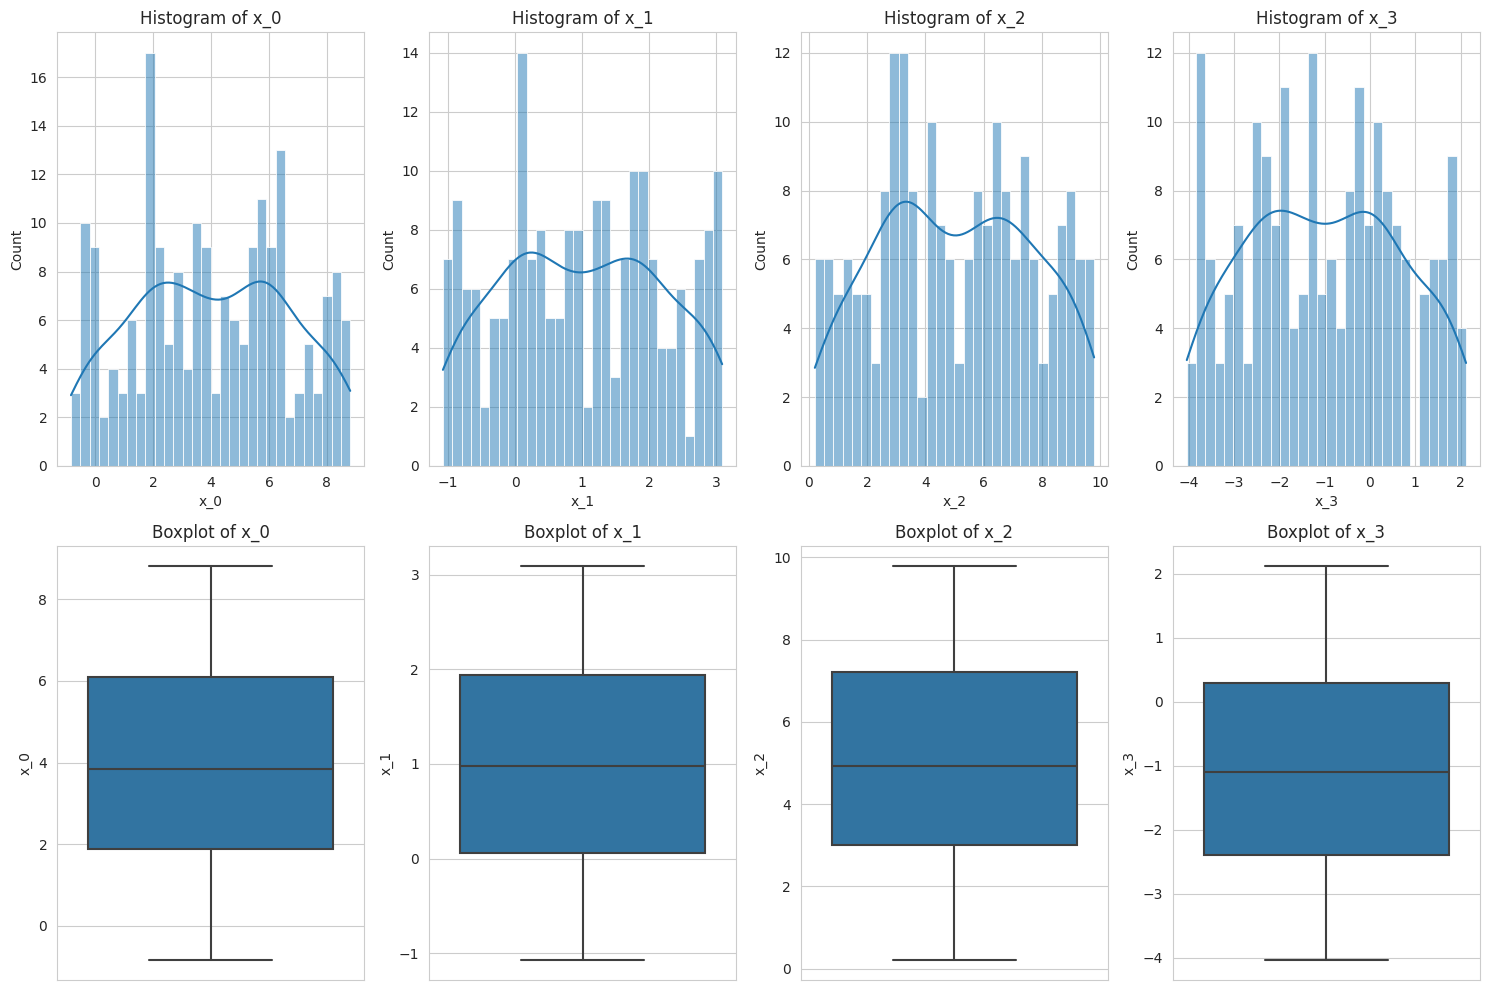

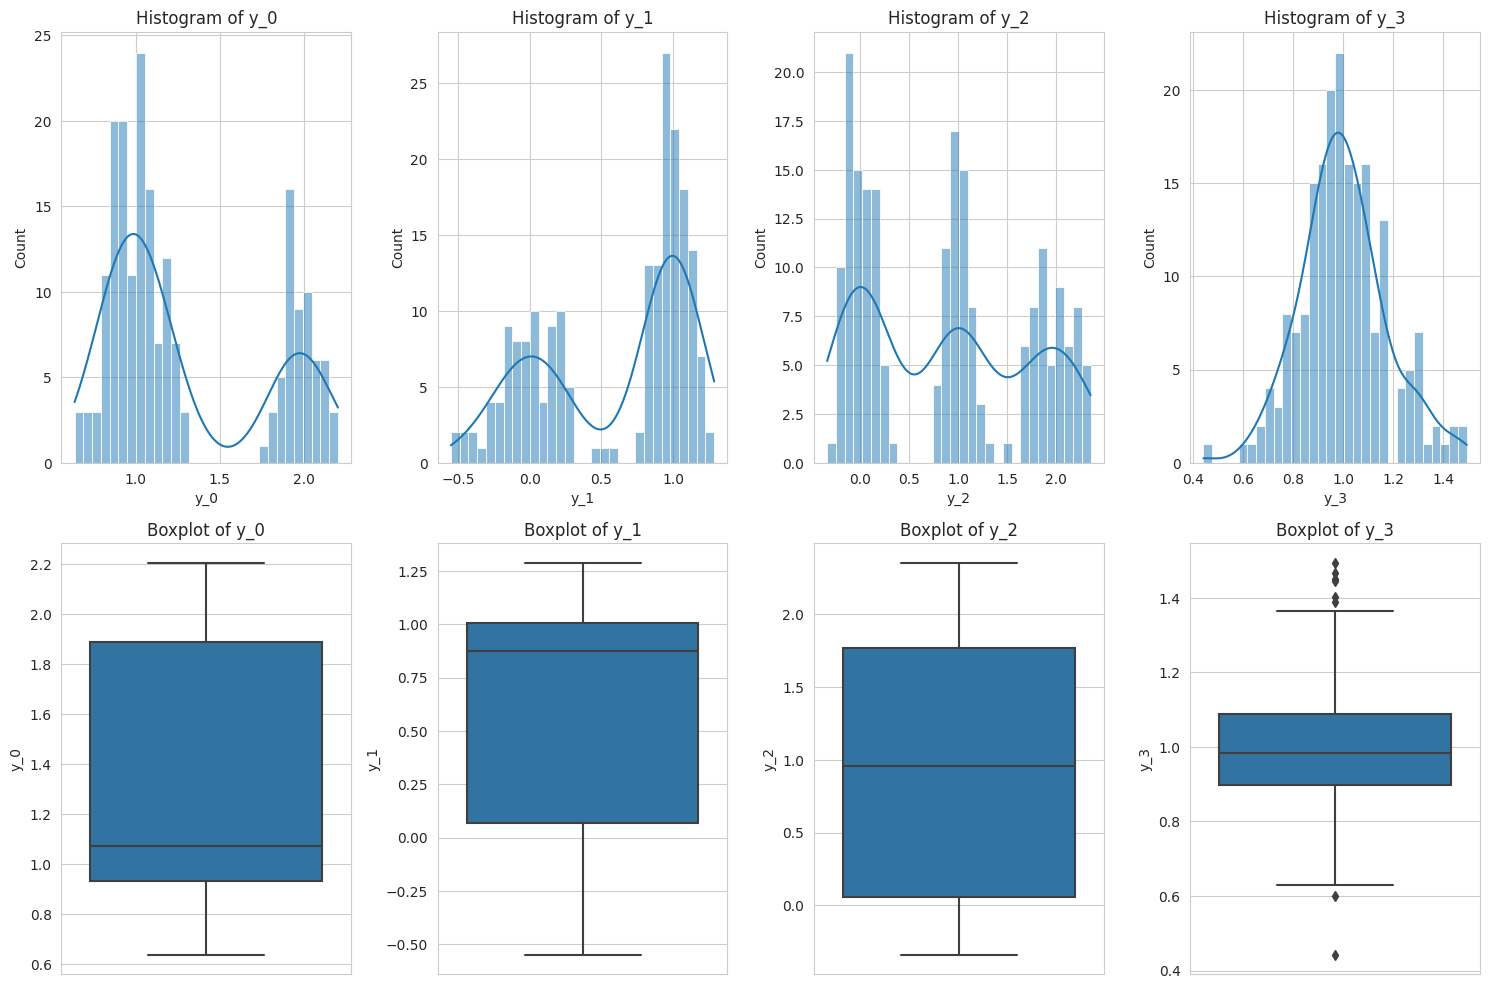

In [20]:
for data in data_list:
  print_plots(data)

Гистограммы и ящики с усами:

Для обоих наборов данных переменные распределены по-разному, что указывает на различные характеристики каждого набора.
В данных X_4_3 наблюдается более широкий разброс значений по сравнению с данными Y_4_3.

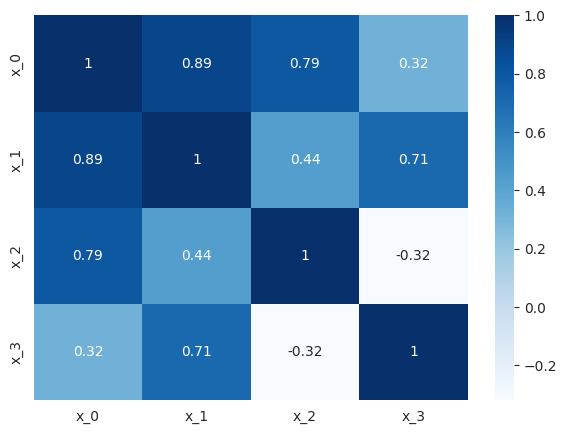

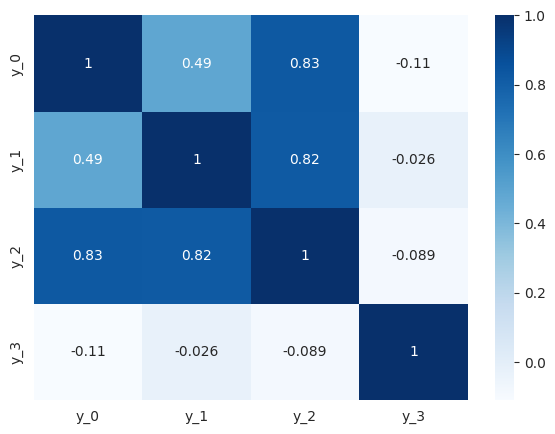

In [21]:
for data in data_list:
  print_corr_matrix(data)

Корреляционные матрицы:

В данных X_4_3 наблюдается самая сильная кореляция между признаками x_0 и x_1, так же есть чуть более слабая корееляция между признаками x_0, x_2, и x_1, x_3. Остальные признаки имеют слабую кореляцию.

В данных Y_4_3 также преобладает корреляция между признаками y_0, y_2 и y_1, y_2.

### Работа с пропусками

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [23]:
data_x.isna().sum()

x_0    0
x_1    0
x_2    0
x_3    0
dtype: int64

In [24]:
data_y.isna().sum()

y_0    0
y_1    0
y_2    0
y_3    0
dtype: int64

Пропущенные значения отсутствуют

### Обработка выбросов

In [25]:
def find_outliers(data: pd.DataFrame) -> pd.DataFrame:
  outliers_iqr = []

  for column in data.columns:
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1

      outliers_condition = (data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))
      outliers = data[outliers_condition].index.tolist()

      outliers_iqr.extend(outliers)

  outliers_iqr = list(set(outliers_iqr))

  outliers_data_iqr = data.loc[outliers_iqr].sort_index()

  print("Outliers num:", len(outliers_iqr))
  print(outliers_data_iqr)
  print()
  return outliers_data_iqr

In [26]:
outliers = []
for data in data_list:
  outliers.append(find_outliers(data))

Outliers num: 0
Empty DataFrame
Columns: [x_0, x_1, x_2, x_3]
Index: []

Outliers num: 8
          y_0       y_1       y_2       y_3
39   1.077962  0.878253  1.019204  1.403134
58   1.048847  1.007364  0.888958  1.387802
66   0.937052  0.995681  0.775366  1.446457
105  0.930273  1.107526  0.963757  0.442493
141  0.733994  1.106157  1.120641  1.493608
158  1.044071  1.096154  1.015372  0.599134
174  1.006896  0.967088  1.084352  1.466987
185  0.975418  1.036623  1.127463  1.451772



In [27]:
data_y = data_y.drop(outliers[1].index)

In [28]:
data_y.shape

(191, 4)

Выбросы были успешно обнаружены и обработаны:

В наборе данных X_4_3 выбросов не обнаружено.

В наборе данных Y_4_3 найдено 8 выбросов, которые были удалены. После удаления размер набора данных Y_4_3 составляет 191 строку и 4 столбца.

### Нормализация данных

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
data_x = scaler.fit_transform(data_x)
data_y = scaler.fit_transform(data_y)

### Матрицы расстояний и близости

In [31]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

In [32]:
dist_euclidean_x = squareform(pdist(data_x, 'euclidean'))
dist_minkowski_x = squareform(pdist(data_x, 'minkowski'))

dist_euclidean_y = squareform(pdist(data_y, 'euclidean'))
dist_minkowski_y = squareform(pdist(data_y, 'minkowski'))

In [33]:
def get_similarity_matrix(data: np.ndarray) -> np.ndarray:
  std = data.std()
  f = lambda x: np.exp(-((x*x)/2 * std * std))
  return f(data)

In [34]:
sim_euclidean_x = get_similarity_matrix(dist_euclidean_x)
sim_minkowski_x = get_similarity_matrix(dist_minkowski_x)
sim_euclidean_y = get_similarity_matrix(dist_euclidean_y)
sim_minkowski_y = get_similarity_matrix(dist_minkowski_y)

### Графовая модель данных

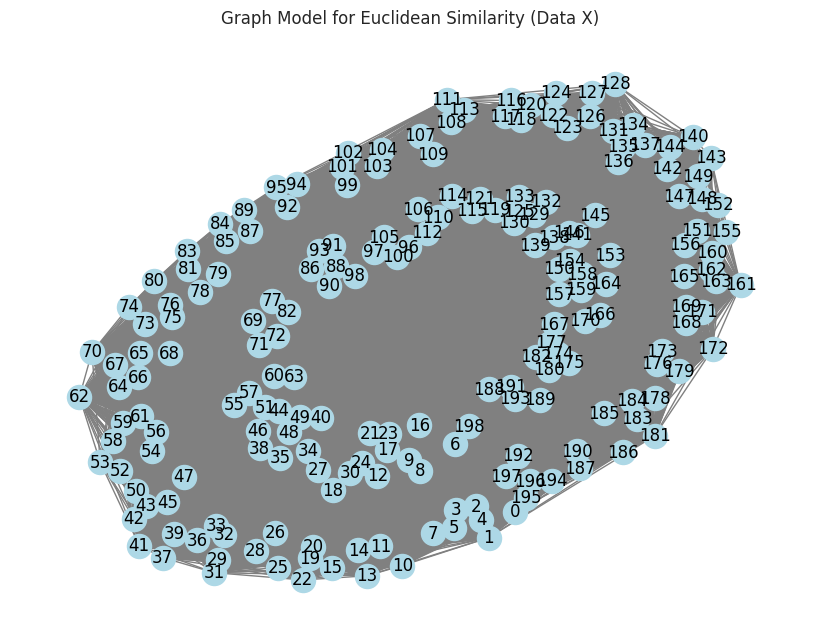

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Функция для построения графа на основе матрицы близости
def build_graph(similarity_matrix):
    G = nx.Graph()

    for i in range(similarity_matrix.shape[0]):
        for j in range(i + 1, similarity_matrix.shape[1]):
            # Добавление ребра с весом, равным значению близости
            G.add_edge(i, j, weight=similarity_matrix[i][j])

    return G

# Построение графов на основе матриц близости
graph_euclidean_x = build_graph(sim_euclidean_x)
graph_minkowski_x = build_graph(sim_minkowski_x)
graph_euclidean_y = build_graph(sim_euclidean_y)
graph_minkowski_y = build_graph(sim_minkowski_y)

# Визуализация одного из графов для примера
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph_euclidean_x)  # Расположение узлов с использованием алгоритма spring layout
nx.draw(graph_euclidean_x, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Graph Model for Euclidean Similarity (Data X)")
plt.show()

Граф на основе евклидовой матрицы близости для набора данных X был успешно создан и визуализирован. В этом графе:

Вершины представляют отдельные элементы данных.
Рёбра соединяют пары элементов, а их веса (показанные разными оттенками синего) отражают степень близости между элементами.

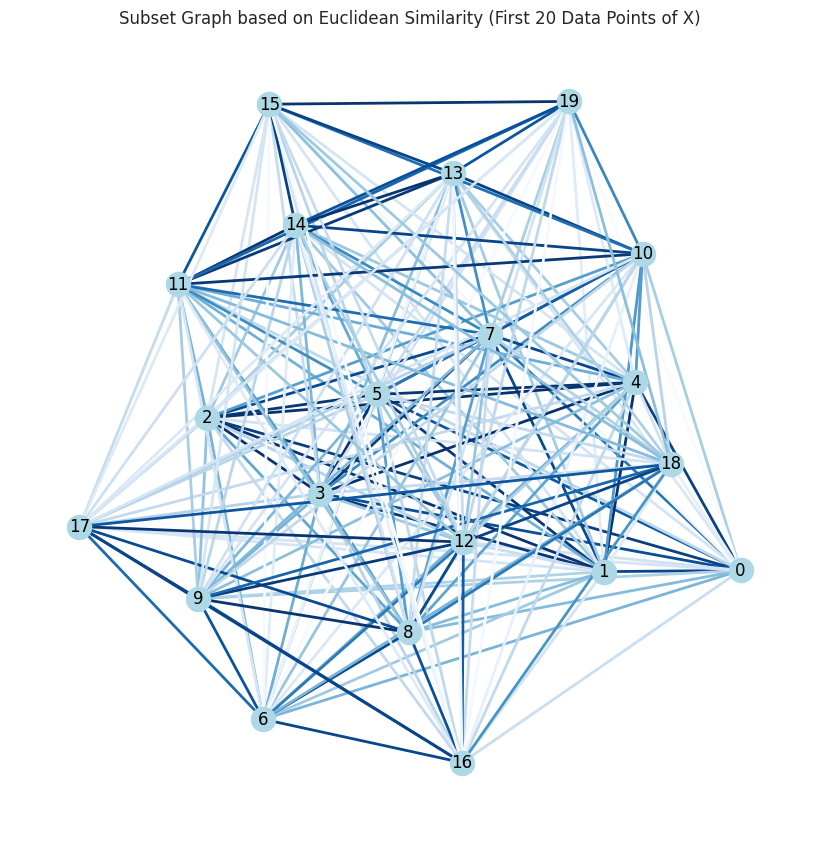

In [36]:
# Выбор подмножества данных для уменьшения сложности графа
# Визуализация графа с первыми 20 вершинами
subset_size = 20
subset_sim_euclidean_x = sim_euclidean_x[:subset_size, :subset_size]

# Создание подграфа
G_subset = nx.Graph()

# Добавление рёбер с весами в подграф
for i in range(subset_size):
    for j in range(i + 1, subset_size):
        G_subset.add_edge(i, j, weight=subset_sim_euclidean_x[i][j])

# Визуализация подграфа
pos_subset = nx.spring_layout(G_subset)  # Расположение вершин
weights_subset = [G_subset[u][v]['weight'] for u, v in G_subset.edges()]  # Веса для рёбер

plt.figure(figsize=(8, 8))
nx.draw(G_subset, pos_subset, with_labels=True, node_color='lightblue', edge_color=weights_subset, width=2, edge_cmap=plt.cm.Blues)
plt.title("Subset Graph based on Euclidean Similarity (First 20 Data Points of X)")
plt.show()


## Кластеризация для числа кластеров k=2
1.1 Найти разбиение каждого набора данных на 2 кластера с помощью следующих алгоритмов
- Один (на выбор) из алгоритмов иерархической кластеризации: Threshold method=MST
method=Single Linkage, Complete Linkage, Average Linkage, Centroid Linkage, Ward Linkage).
Можно использовать матрицу близостей или матрицу расстояний.
- k-means
- EM алгоритм
- Spectral algorithm (использовать матрицу близостей)



### Поиск кластеров

In [37]:
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [38]:
def visualize(data_list, predictions_list, algorithm_names):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 5))
    col_number = len(data_list)

    # Создание подграфиков для каждого набора данных
    for i, data in enumerate(data_list):
        filtered_label0 = data[predictions_list[i] == 0]
        filtered_label1 = data[predictions_list[i] == 1]
        plt.subplot(1, col_number, i + 1)
        plt.scatter(filtered_label0[:,0], filtered_label0[:,1], color='green')
        plt.scatter(filtered_label1[:,0], filtered_label1[:,1], color='orange')
        plt.title(f'{algorithm_names[i]} Clustering')

    plt.tight_layout()
    plt.show()

In [39]:
algorithms = ['Euclidean_X', 'Minkowski_X', 'Euclidean_Y', 'Minkowski_Y']


In [40]:
ward_clustering_euclidean_x = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(dist_euclidean_x)
ward_clustering_minkowski_x = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(dist_minkowski_x)
ward_clustering_euclidean_y = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(dist_euclidean_y)
ward_clustering_minkowski_y = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(dist_minkowski_y)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distanc

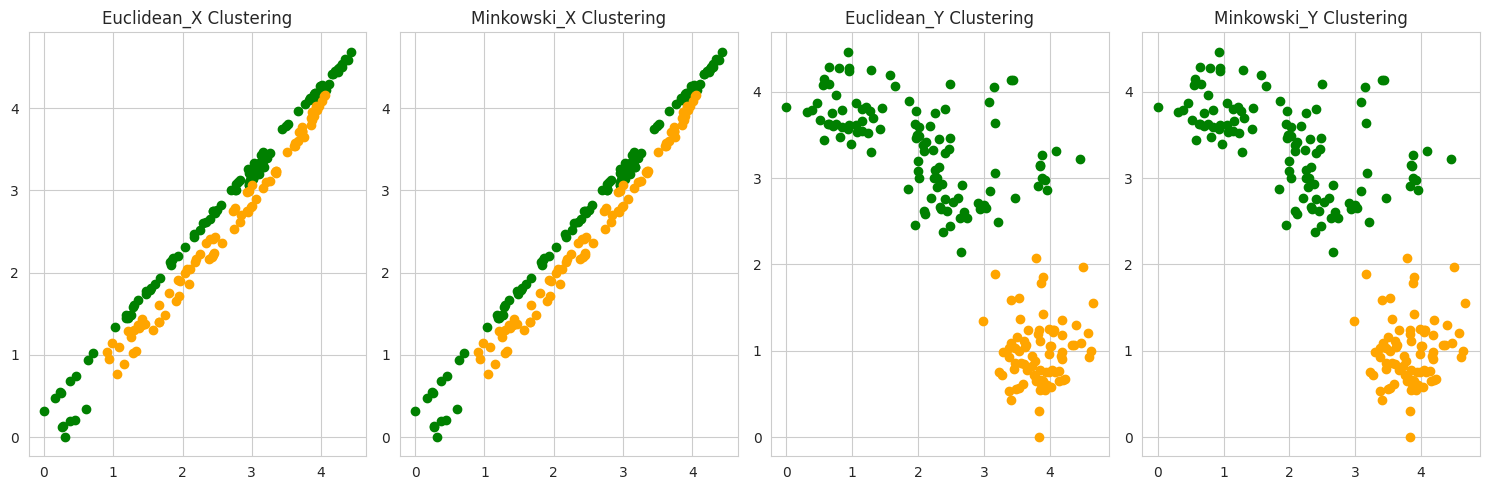

In [41]:
visualize([dist_euclidean_x, dist_minkowski_x, dist_euclidean_y, dist_minkowski_y],
          [ward_clustering_euclidean_x, ward_clustering_minkowski_x, ward_clustering_euclidean_y, ward_clustering_minkowski_y],
          algorithms)


Наблюдения: Кластеры выглядят довольно чётко разделёнными как для евклидова расстояния, так и для растояния Минсковского. Это может указывать на то, что данные хорошо подходят для иерархической кластеризации с использованием метода Ward.

In [42]:
kmeans_clustering_euclidean_x = KMeans(n_clusters=2, n_init='auto').fit_predict(dist_euclidean_x)
kmeans_clustering_minkowski_x = KMeans(n_clusters=2, n_init='auto').fit_predict(dist_minkowski_x)
kmeans_clustering_euclidean_y = KMeans(n_clusters=2, n_init='auto').fit_predict(dist_euclidean_y)
kmeans_clustering_minkowski_y = KMeans(n_clusters=2, n_init='auto').fit_predict(dist_minkowski_y)

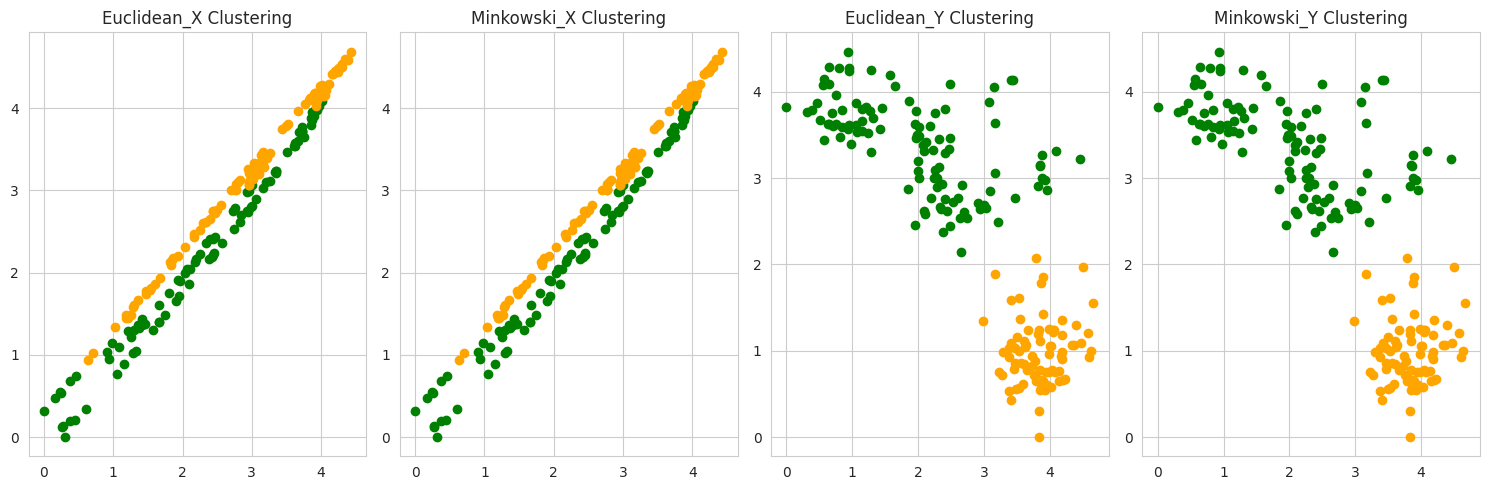

In [43]:
visualize([dist_euclidean_x, dist_minkowski_x, dist_euclidean_y, dist_minkowski_y],
          [kmeans_clustering_euclidean_x, kmeans_clustering_minkowski_x, kmeans_clustering_euclidean_y, kmeans_clustering_minkowski_y],
          algorithms)


Наблюдения: K-means также создаёт довольно ясные кластеры, но распределение может быть менее однородным по сравнению с иерархической кластеризацией. Это может указывать на некоторую чувствительность кластеров к начальной инициализации центроидов.

In [44]:
em_clustering_euclidean_x = GaussianMixture(n_components=2).fit_predict(dist_euclidean_x)
em_clustering_minkowski_x = GaussianMixture(n_components=2).fit_predict(dist_minkowski_x)
em_clustering_euclidean_y = GaussianMixture(n_components=2).fit_predict(dist_euclidean_y)
em_clustering_minkowski_y = GaussianMixture(n_components=2).fit_predict(dist_minkowski_y)

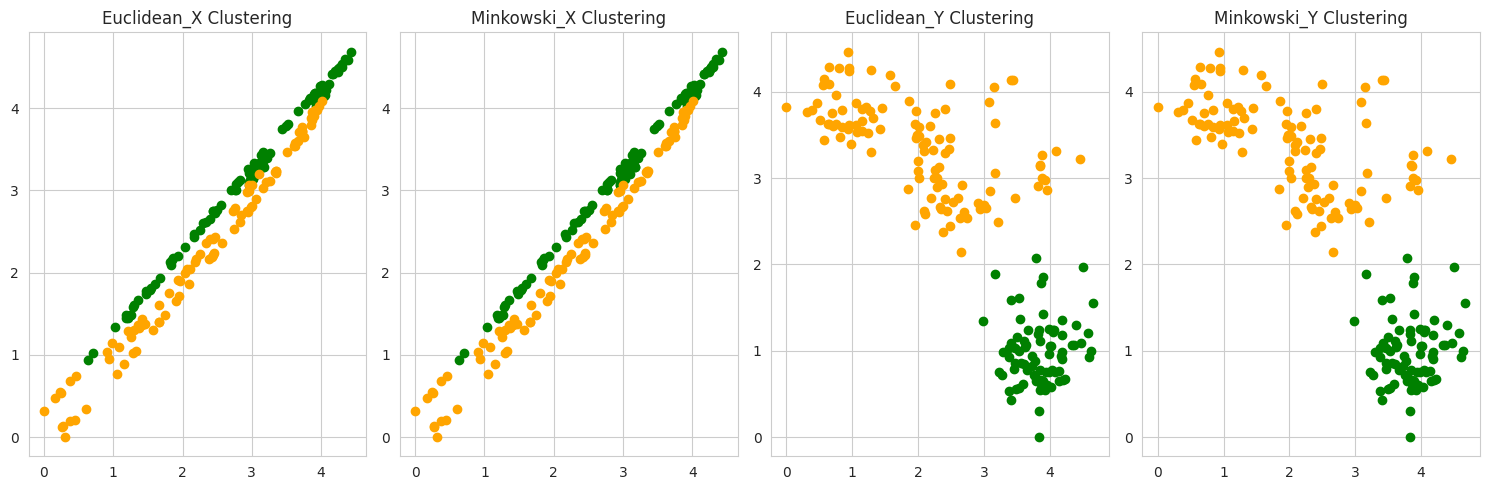

In [45]:
visualize([dist_euclidean_x, dist_minkowski_x, dist_euclidean_y, dist_minkowski_y],
          [em_clustering_euclidean_x, em_clustering_minkowski_x, em_clustering_euclidean_y, em_clustering_minkowski_y],
          algorithms)


Наблюдения: Результаты EM-алгоритма визуально очень похожи на результат K-Means алгоритма.

In [46]:
spectral_clustering_euclidean_x = SpectralClustering(n_clusters=2).fit_predict(sim_euclidean_x)
spectral_clustering_minkowski_x = SpectralClustering(n_clusters=2).fit_predict(sim_minkowski_x)
spectral_clustering_euclidean_y = SpectralClustering(n_clusters=2).fit_predict(sim_euclidean_y)
spectral_clustering_minkowski_y = SpectralClustering(n_clusters=2).fit_predict(sim_minkowski_y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``a

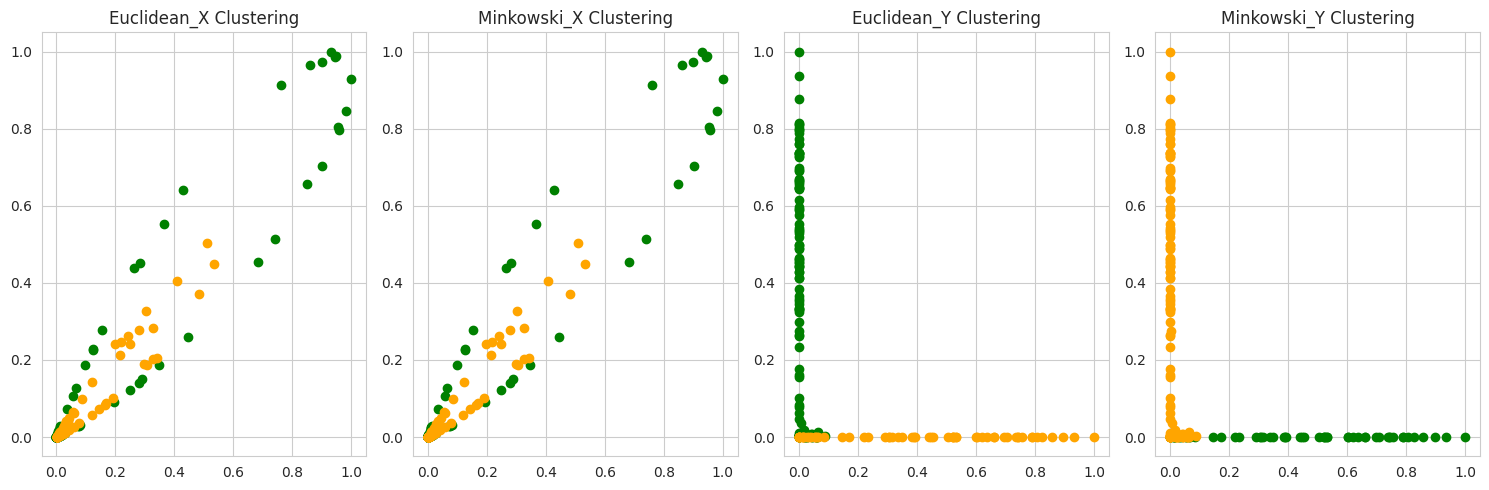

In [47]:
visualize([sim_euclidean_x, sim_minkowski_x, sim_euclidean_y, sim_minkowski_y],
          [spectral_clustering_euclidean_x, spectral_clustering_minkowski_x, spectral_clustering_euclidean_y, spectral_clustering_minkowski_y],
          algorithms)


Наблюдения: Спектральная кластеризация, основанная на матрице близости, демонстрирует интересные результаты, которые координально отличаются от рассмотренных ранее методов. Так для X и Y мы имеем абсолютно разные представления на графике. Для Y видно, что у нас есть значение или по X координате или только по Y, если значение удалено от 0.

**Сравнение методов**: Основывась на визульном представлении полученных кластеров иерархическая кластеризация  кажется более подходящей для линейно разделимых кластеров, в то время как K-means, EM и спектральная кластеризация могут быть предпочтительнее для более сложных структур.

**Выбор расстояния**: Выбор метрики расстояния также играет важную роль. Евклидово расстояние кажется более информативным в данном случае.

### Вычисление RAND index

1.2 Сравнить попарно разбиения, полученные разными методами с помощью RAND индекса
(вычислить RAND индекс для каждой пары разбиений). Дать комментарий к результату.

In [48]:
from sklearn.metrics import rand_score

In [49]:
data = {'euclidean_x': [ward_clustering_euclidean_x, kmeans_clustering_euclidean_x, em_clustering_euclidean_x, spectral_clustering_euclidean_x],
        'minkowski_x': [ward_clustering_minkowski_x, kmeans_clustering_minkowski_x, em_clustering_minkowski_x, spectral_clustering_minkowski_x],
        'euclidean_y': [ward_clustering_euclidean_y, kmeans_clustering_euclidean_y, em_clustering_euclidean_y, spectral_clustering_euclidean_y],
        'minkowski_y': [ward_clustering_minkowski_y, kmeans_clustering_minkowski_y, em_clustering_minkowski_y, spectral_clustering_minkowski_y]}

methods = ['ward', 'kmeans', 'em', 'spectral']

for dist, predictions_list in data.items():
  print(dist)
  for i in range(len(predictions_list) - 1):
    for j in range (i + 1, len(predictions_list)):
      print('rand_score for', methods[i], 'and', methods[j], ':', rand_score(predictions_list[i], predictions_list[j]))
  print()

euclidean_x
rand_score for ward and kmeans : 0.8599055885488046
rand_score for ward and em : 0.8429521344094209
rand_score for ward and spectral : 0.49748743718592964
rand_score for kmeans and em : 0.9800010151768945
rand_score for kmeans and spectral : 0.5020557332115121
rand_score for em and spectral : 0.5003299324907365

minkowski_x
rand_score for ward and kmeans : 0.8599055885488046
rand_score for ward and em : 0.8599055885488046
rand_score for ward and spectral : 0.49748743718592964
rand_score for kmeans and em : 1.0
rand_score for kmeans and spectral : 0.5020557332115121
rand_score for em and spectral : 0.5020557332115121

euclidean_y
rand_score for ward and kmeans : 1.0
rand_score for ward and em : 1.0
rand_score for ward and spectral : 0.606503168917057
rand_score for kmeans and em : 1.0
rand_score for kmeans and spectral : 0.606503168917057
rand_score for em and spectral : 0.606503168917057

minkowski_y
rand_score for ward and kmeans : 1.0
rand_score for ward and em : 1.0
rand

Результаты вычисления RAND индекса для разных пар алгоритмов кластеризации показывают следующее:

####Набор данных Euclidean X

Ward, K-means и EM алгоритмы показывают сравнительно высокий RAND индекс. Это указывает на то, что различные методы кластеризации дают схожее разбиение на кластеры для этого набора данных. Spectral имеет низкое значение в паре со всеми остальными.

####Набор данных Minkowski X
Аналогично набору данных Euclidean X, K-means и EM имеют высокией уровень индекса, а k-means и em совпадают полностью.
Спектральная кластеризация имеет мньший уровень согласованности.

####Набор данных Euclidean Y
Кластеризация с помощью методов Ward, K-means и EM дают одинаковые результаты на этих данных. Для остальных пар алгоритмов значение индекса гораздо ниже.

####Набор данных Minkowski Y
Результат индекса аналогичен резултьтатам для евклидова расстояния. Для данных y не имеет значения какое расстояние выбирать между евклидовым и расстоянием Минковского.

###Общие выводы
Согласованность методов: Для некоторых наборов данных (особенно для Minkowski Y) методы кластеризации показывают высокую степень согласованности.

Различия в спектральной кластеризации: Спектральная кластеризация часто демонстрирует результаты, отличающиеся от других методов, что может быть связано с её способностью выявлять более сложные структуры в данных.

Выбор метода: Выбор метода кластеризации зависит от характеристик данных. Для более простых структур подходят традиционные методы, такие как K-means и иерархическая кластеризация, в то время как для сложных структур может быть предпочтительнее спектральная кластеризация.

### Модулярность

1.3 Вычислить значение функции модулярности для каждого разбиения на 2 кластера из п.1.1.

In [50]:
def compute_modularity(similarity, prediction):
  modularity = 0
  clusters = np.unique(prediction)
  m = np.sum(similarity)

  for cluster in clusters:
    idxs = np.where(prediction == cluster)[0]
    for u in range(idxs.size - 1):
      for v in range(u + 1, idxs.size):
        d_u = np.sum(similarity[u])
        d_v = np.sum(similarity[v])
        modularity += similarity[u][v] / (2 * m) - d_u * d_v / (4 * m * m)

  return modularity


In [51]:
predictions = {'euclidean_x': [ward_clustering_euclidean_x, kmeans_clustering_euclidean_x, em_clustering_euclidean_x, spectral_clustering_euclidean_x],
               'minkowski_x': [ward_clustering_minkowski_x, kmeans_clustering_minkowski_x, em_clustering_minkowski_x, spectral_clustering_minkowski_x],
               'euclidean_y': [ward_clustering_euclidean_y, kmeans_clustering_euclidean_y, em_clustering_euclidean_y, spectral_clustering_euclidean_y],
               'minkowski_y': [ward_clustering_minkowski_y, kmeans_clustering_minkowski_y, em_clustering_minkowski_y, spectral_clustering_minkowski_y]}
similarities = [sim_euclidean_x, sim_minkowski_x, sim_euclidean_y, sim_minkowski_y]
methods = ['ward', 'kmeans', 'em', 'spectral']

sim_idx = 0
for dist, predictions_list in predictions.items():
  E = np.diag(np.full(similarities[sim_idx].shape[0], 1))
  sim_matrix = similarities[sim_idx] - E
  for i in range(len(predictions_list)):
    modularity = compute_modularity(sim_matrix, predictions_list[i])

    print('Modularity for', dist, 'with', methods[i], 'method:', modularity)
  sim_idx += 1

Modularity for euclidean_x with ward method: 0.15204555073371553
Modularity for euclidean_x with kmeans method: 0.15334571287588708
Modularity for euclidean_x with em method: 0.15353419773649113
Modularity for euclidean_x with spectral method: 0.1490578549886584
Modularity for minkowski_x with ward method: 0.15204555073371553
Modularity for minkowski_x with kmeans method: 0.15334571287588708
Modularity for minkowski_x with em method: 0.15334571287588758
Modularity for minkowski_x with spectral method: 0.1490578549886584
Modularity for euclidean_y with ward method: 0.06806384241520157
Modularity for euclidean_y with kmeans method: 0.06806384241520157
Modularity for euclidean_y with em method: 0.06806384241520178
Modularity for euclidean_y with spectral method: 0.07116929955721833
Modularity for minkowski_y with ward method: 0.06806384241520157
Modularity for minkowski_y with kmeans method: 0.06806384241520157
Modularity for minkowski_y with em method: 0.06806384241520178
Modularity for 


Результаты вычисления модулярности для разных методов кластеризации и наборов данных показывают следующее:

####Набор данных Euclidean X и Minkowski X
- Модулярности для всех методов кластеризации на этих наборах данных сравнительно низкие, что указывает на то, что разделение на кластеры не идеально.

####Набор данных Euclidean Y и Minkowski Y
- Значения модулярности для данных y значительно ниже, чем для данных x, что может свидетельствовать о более слабой кластерной структуре в данных y или о большей однородности данных.


### **1.4 Сделать общие выводы по возможности разбиения на 2 кластера каждого набора данных.**

Основываясь на результатах кластерного анализа, можно сделать следующие общие выводы по возможности разбиения каждого набора данных на 2 кластера:

####1. Различия в Результативности Кластеризации
- Euclidean X и Minkowski X: Разбиение на 2 кластера для этих наборов данных показывает среднюю степень четкости. Иерархическая кластеризация, K-means и EM алгоритмы показали схожие результаты, что говорит о некотором структурном сходстве в данных. Однако, относительно низкие значения модулярности указывают на то, что разделение на два кластера не идеально.
- Euclidean Y и Minkowski Y: Для этих наборов данных, разбиение на 2 кластера показывает менее высокую эффективность. В частности алгоритмы разбились на две группы по согласованности и при этом вышли очень низкие значения модулярности.

## Кластеризация для числа кластеров k=3
2.1 Найти разбиение каждого набора данных на 3 кластера с помощью следующих алгоритмов
- Один (на выбор) из алгоритмов иерархической кластеризации: Threshold method=MST
method=Single Linkage, Complete Linkage, Average Linkage, Centroid Linkage, Ward Linkage).
Можно использовать матрицу близостей или матрицу расстояний.
- k-means
- EM алгоритм
- Spectral algorithm (использовать матрицу близостей)

### Поиск кластеров


In [52]:
def visualize(data_list, predictions_list, algorithm_names):
  sns.set_style("whitegrid")
  plt.figure(figsize=(15, 5))
  col_number = len(data_list)

  for i, data in enumerate(data_list):
    filtered_label0 = data[predictions_list[i] == 0]
    filtered_label1 = data[predictions_list[i] == 1]
    filtered_label2 = data[predictions_list[i] == 2]
    plt.subplot(1, col_number, i + 1)
    plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'green')
    plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'orange')
    plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')

    plt.title(f'{algorithm_names[i]} Clustering')

  plt.tight_layout()
  plt.show()

In [53]:
ward_clustering_3_euclidean_x = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(dist_euclidean_x)
ward_clustering_3_minkowski_x = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(dist_minkowski_x)
ward_clustering_3_euclidean_y = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(dist_euclidean_y)
ward_clustering_3_minkowski_y = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(dist_minkowski_y)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distanc

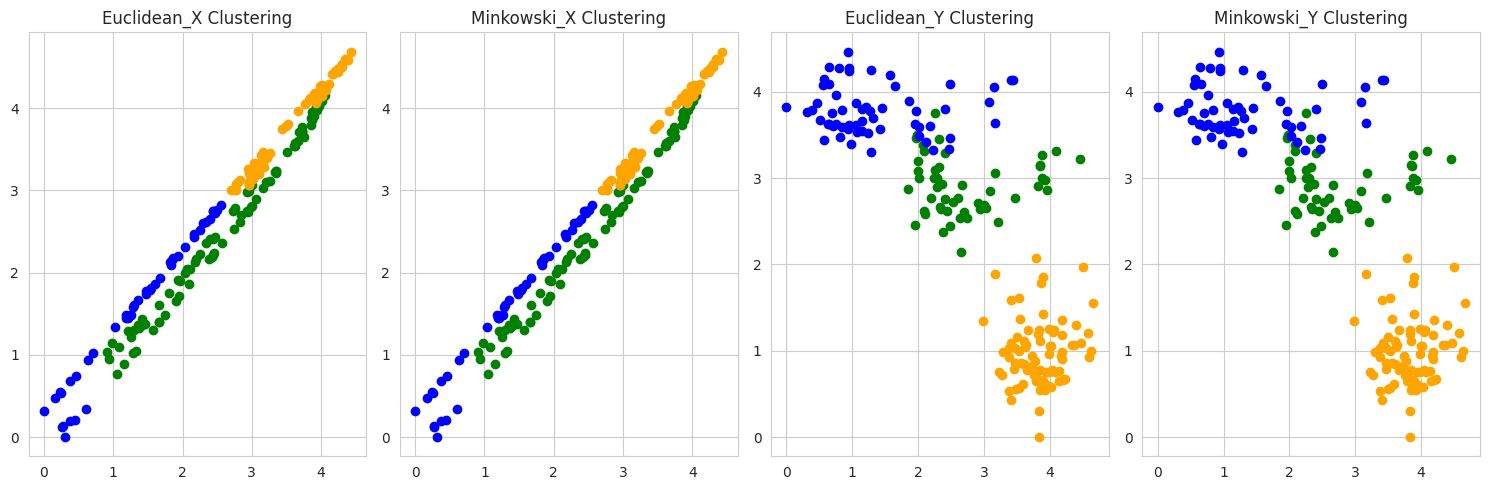

In [54]:
visualize([dist_euclidean_x, dist_minkowski_x, dist_euclidean_y, dist_minkowski_y],
          [ward_clustering_3_euclidean_x, ward_clustering_3_minkowski_x, ward_clustering_3_euclidean_y, ward_clustering_3_minkowski_y], algorithms)


Иерархическая Кластеризация (Ward Linkage)
Анализ Результатов: Иерархическая кластеризация, использующая метод Ward, обычно хорошо работает, когда в данных присутствуют чётко определённые иерархии кластеров. Визуализации показывают довольно чёткое разделение на кластеры. Разбиения на X совпадают. Видны чёткие три кластера на Y разбиениях.

In [55]:
kmeans_clustering_3_euclidean_x = KMeans(n_clusters=3, n_init='auto').fit_predict(dist_euclidean_x)
kmeans_clustering_3_minkowski_x = KMeans(n_clusters=3, n_init='auto').fit_predict(dist_minkowski_x)
kmeans_clustering_3_euclidean_y = KMeans(n_clusters=3, n_init='auto').fit_predict(dist_euclidean_y)
kmeans_clustering_3_minkowski_y = KMeans(n_clusters=3, n_init='auto').fit_predict(dist_minkowski_y)

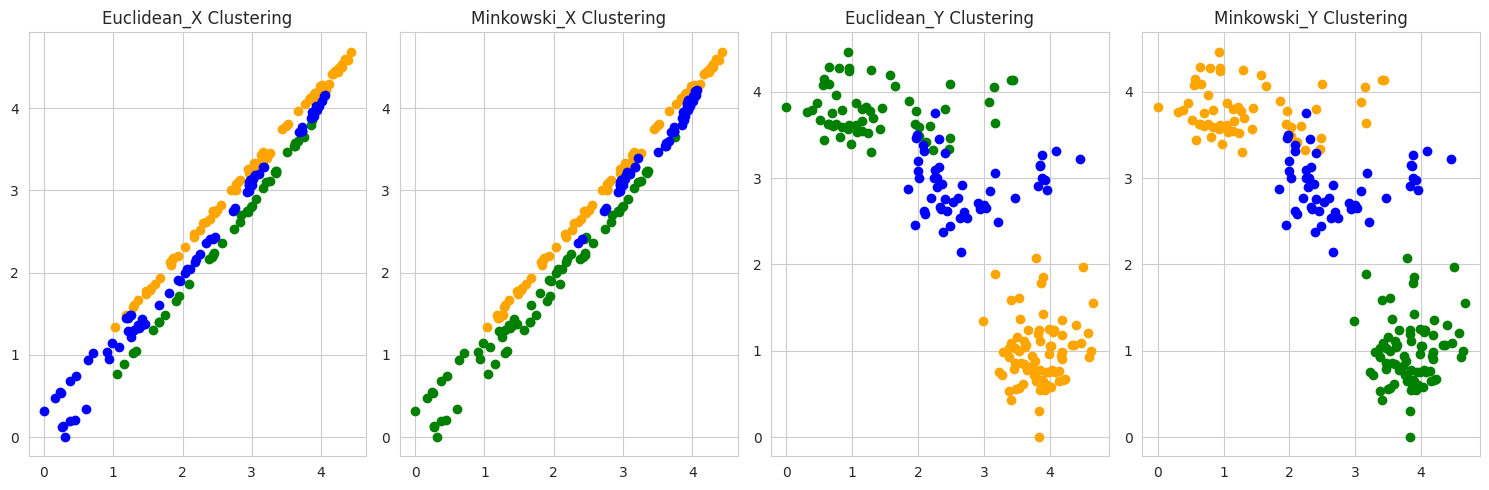

In [56]:
visualize([dist_euclidean_x, dist_minkowski_x, dist_euclidean_y, dist_minkowski_y],
          [kmeans_clustering_3_euclidean_x, kmeans_clustering_3_minkowski_x, kmeans_clustering_3_euclidean_y, kmeans_clustering_3_minkowski_y], algorithms)


Анализ Результатов: K-means стремится минимизировать вариацию внутри кластера и хорошо подходит для линейно разделимых кластеров. Результаты показывают довольно чёткое разделение, хотя качество зависит от начальной инициализации центроидов. В нашем случае по X мы получили различные разбиения, а для Y изменённые метки классов.

In [57]:
em_clustering_3_euclidean_x = GaussianMixture(n_components=3).fit_predict(dist_euclidean_x)
em_clustering_3_minkowski_x = GaussianMixture(n_components=3).fit_predict(dist_minkowski_x)
em_clustering_3_euclidean_y = GaussianMixture(n_components=3).fit_predict(dist_euclidean_y)
em_clustering_3_minkowski_y = GaussianMixture(n_components=3).fit_predict(dist_minkowski_y)

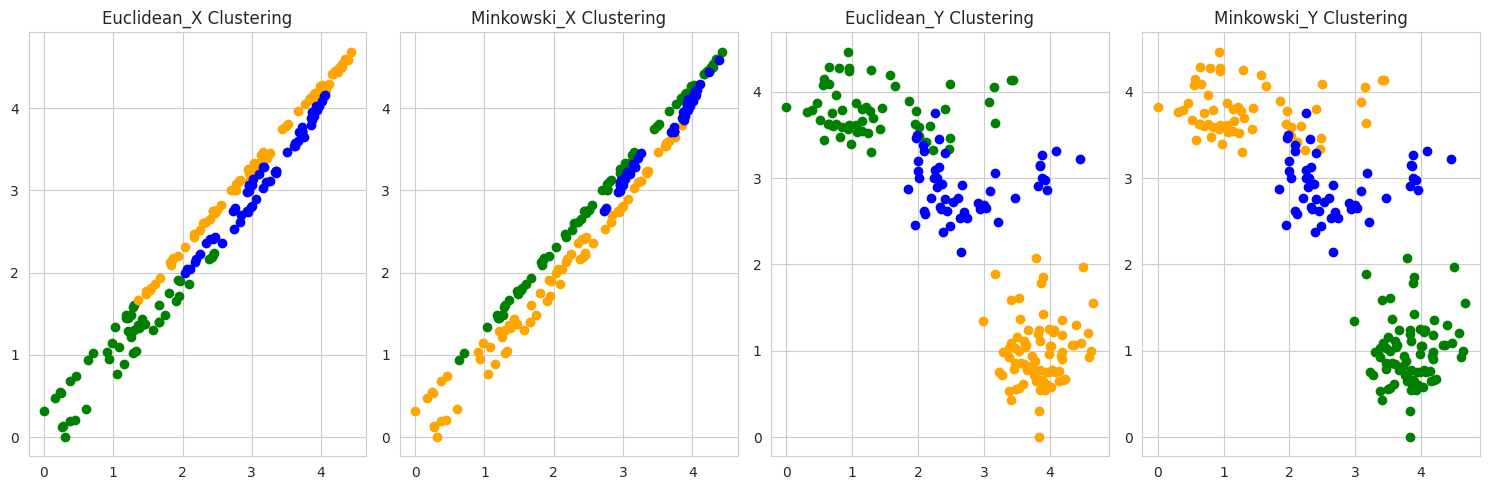

In [58]:
visualize([dist_euclidean_x, dist_minkowski_x, dist_euclidean_y, dist_minkowski_y],
          [em_clustering_3_euclidean_x, em_clustering_3_minkowski_x, em_clustering_3_euclidean_y, em_clustering_3_minkowski_y], algorithms)


Анализ Результатов: EM алгоритм идеален для данных, которые можно аппроксимировать смесью гауссовских распределений. Он может идентифицировать перекрывающиеся кластеры и хорошо работает в условиях неопределённости. В нашем случае по X мы получили различные разбиения, а для Y изменённые метки классов.

In [59]:
spectral_clustering_3_euclidean_x = SpectralClustering(n_clusters=3).fit_predict(sim_euclidean_x)
spectral_clustering_3_minkowski_x = SpectralClustering(n_clusters=3).fit_predict(sim_minkowski_x)
spectral_clustering_3_euclidean_y = SpectralClustering(n_clusters=3).fit_predict(sim_euclidean_y)
spectral_clustering_3_minkowski_y = SpectralClustering(n_clusters=3).fit_predict(sim_minkowski_y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``a

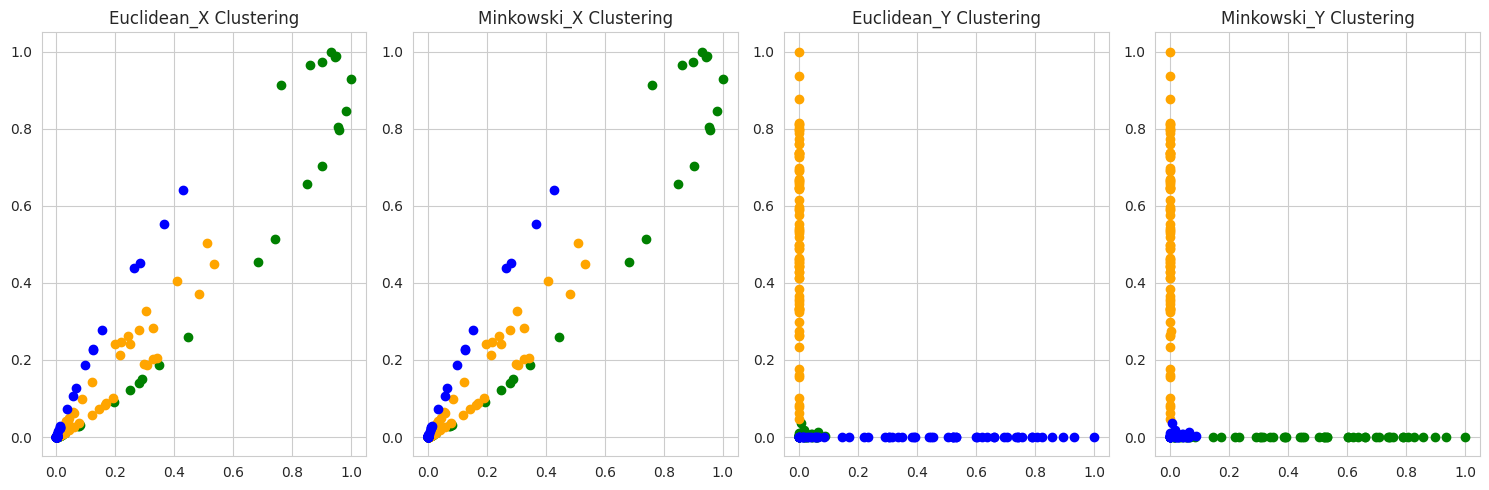

In [74]:
visualize([sim_euclidean_x, sim_minkowski_x, sim_euclidean_y, sim_minkowski_y],
          [spectral_clustering_3_euclidean_x, spectral_clustering_3_minkowski_x, spectral_clustering_3_euclidean_y, spectral_clustering_3_minkowski_y], algorithms)

Для спектрально кластеризации мы видим одинаковые классы, но с разными метками в случаях X и Y.

### Вычисление RAND index
2.2 Сравнить попарно разбиения, полученные разными методами с помощью RAND индекса
(вычислить RAND индекс для каждой пары разбиений). Дать комментарий к результату.

In [61]:
data = {'euclidean_x': [ward_clustering_3_euclidean_x, kmeans_clustering_3_euclidean_x, em_clustering_3_euclidean_x, spectral_clustering_3_euclidean_x],
        'minkowski_x': [ward_clustering_3_minkowski_x, kmeans_clustering_3_minkowski_x, em_clustering_3_minkowski_x, spectral_clustering_3_minkowski_x],
        'euclidean_y': [ward_clustering_3_euclidean_y, kmeans_clustering_3_euclidean_y, em_clustering_3_euclidean_y, spectral_clustering_3_euclidean_y],
        'minkowski_y': [ward_clustering_3_minkowski_y, kmeans_clustering_3_minkowski_y, em_clustering_3_minkowski_y, spectral_clustering_3_minkowski_y]}
methods = ['ward', 'kmeans', 'em', 'spectral']

for dist, predictions_list in data.items():
  print(dist)
  for i in range(len(predictions_list) - 1):
    for j in range (i + 1, len(predictions_list)):
      print('rand_score for', methods[i], 'and', methods[j], ':', rand_score(predictions_list[i], predictions_list[j]))
  print()

euclidean_x
rand_score for ward and kmeans : 0.6980863915537282
rand_score for ward and em : 0.742754174914979
rand_score for ward and spectral : 0.6781889244200802
rand_score for kmeans and em : 0.793005431196386
rand_score for kmeans and spectral : 0.6984924623115578
rand_score for em and spectral : 0.6482412060301508

minkowski_x
rand_score for ward and kmeans : 0.7031622760265976
rand_score for ward and em : 0.717374752550632
rand_score for ward and spectral : 0.6781889244200802
rand_score for kmeans and em : 0.9072128318359474
rand_score for kmeans and spectral : 0.6211359829450281
rand_score for em and spectral : 0.618496523019136

euclidean_y
rand_score for ward and kmeans : 1.0
rand_score for ward and em : 1.0
rand_score for ward and spectral : 1.0
rand_score for kmeans and em : 1.0
rand_score for kmeans and spectral : 1.0
rand_score for em and spectral : 1.0

minkowski_y
rand_score for ward and kmeans : 1.0
rand_score for ward and em : 1.0
rand_score for ward and spectral : 1.

Результаты вычисления RAND индекса для разных пар методов кластеризации при разбиении на три кластера показывают следующее:

####Набор данных Euclidean X и Minkowski X
- Согласованность Методов: Ward, K-means и EM алгоритмы демонстрируют высокий уровень совпадения разбиений. Снова выделяется spectral со средним значением 0.6 для всех пар.

####Набор данных Euclidean Y и Minkowski Y
- Полное Совпадение: Для всех алгоритмов показано полное совпадение разбиений (RAND индекс = 1.0).

### Модулярность
2.3 Вычислить значение функции модулярности для каждого разбиения на 3 кластера из п.2.1.

In [62]:
def compute_modularity(similarity, prediction):
  modularity = 0
  clusters = np.unique(prediction)
  m = np.sum(similarity)

  for cluster in clusters:
    idxs = np.where(prediction == cluster)[0]
    for u in range(idxs.size - 1):
      for v in range(u + 1, idxs.size):
        d_u = np.sum(similarity[u])
        d_v = np.sum(similarity[v])
        modularity += similarity[u][v] / (2 * m) - d_u * d_v / (4 * m * m)

  return modularity


In [63]:
predictions = {'euclidean_x': [ward_clustering_3_euclidean_x, kmeans_clustering_3_euclidean_x, em_clustering_3_euclidean_x, spectral_clustering_3_euclidean_x],
               'minkowski_x': [ward_clustering_3_minkowski_x, kmeans_clustering_3_minkowski_x, em_clustering_3_minkowski_x, spectral_clustering_3_minkowski_x],
               'euclidean_y': [ward_clustering_3_euclidean_y, kmeans_clustering_3_euclidean_y, em_clustering_3_euclidean_y, spectral_clustering_3_euclidean_y],
               'minkowski_y': [ward_clustering_3_minkowski_y, kmeans_clustering_3_minkowski_y, em_clustering_3_minkowski_y, spectral_clustering_3_minkowski_y]}
similarities = [sim_euclidean_x, sim_minkowski_x, sim_euclidean_y, sim_minkowski_y]
methods = ['ward', 'kmeans', 'em', 'spectral']

sim_idx = 0
for dist, predictions_list in predictions.items():
  E = np.diag(np.full(similarities[sim_idx].shape[0], 1))
  sim_matrix = similarities[sim_idx] - E
  for i in range(len(predictions_list)):
    modularity = compute_modularity(sim_matrix, predictions_list[i])

    print('Modularity for', dist, 'with', methods[i], 'method:', modularity)
  sim_idx += 1

Modularity for euclidean_x with ward method: 0.15365921526248277
Modularity for euclidean_x with kmeans method: 0.1534864928511193
Modularity for euclidean_x with em method: 0.15515335981438158
Modularity for euclidean_x with spectral method: 0.15612253974987486
Modularity for minkowski_x with ward method: 0.15365921526248277
Modularity for minkowski_x with kmeans method: 0.15379164834800643
Modularity for minkowski_x with em method: 0.15367603411341577
Modularity for minkowski_x with spectral method: 0.15612253974987486
Modularity for euclidean_y with ward method: 0.04656324243328373
Modularity for euclidean_y with kmeans method: 0.04656324243328371
Modularity for euclidean_y with em method: 0.04656324243328371
Modularity for euclidean_y with spectral method: 0.04656324243328373
Modularity for minkowski_y with ward method: 0.04656324243328373
Modularity for minkowski_y with kmeans method: 0.04656324243328383
Modularity for minkowski_y with em method: 0.04656324243328383
Modularity for

Анализируя полученные значения модулярности для различных методов кластеризации на двух наборах данных (Euclidean X, Minkowski X, Euclidean Y, Minkowski Y), можно сделать следующие выводы:

####Наборы данных Euclidean X и Minkowski X
- Модулярность: Значения модулярности для всех методов кластеризации на этих наборах данных находятся в диапазоне от 0.15 до 0.16, что является умеренно низкие значением.
- Сравнение Методов: Все методы показывают схожие значения модулярности, что говорит о том, что они в равной степени способны выявить кластерную структуру в данных.

###Наборы данных Euclidean Y и Minkowski Y
- Модулярность: Значения модулярности заметно ниже, чем для первых двух наборов данных, оставаясь в районе 0.046 для всех методов. Это говорит о том, что разделение на кластеры не является чётким и что возможно кластеры не являются хорошо определёнными.
- Однородность Результатов: Однородно низкие значения модулярности для всех методов могут указывать на то, что данные не имеют ярко выраженной кластерной структуры, или что разделение на три кластера не является оптимальным для этих наборов данных.
- Выбор Метода: Ни один из методов не выделяется среди других, что подчёркивает неопределённость кластерной структуры в данных.


### **2.4 Сделать общие выводы по возможности разбиения на 3 кластера каждого набора данных.**

На основе анализа результатов кластеризации на три кластера с использованием различных методов для каждого из наборов данных (Euclidean X, Minkowski X, Euclidean Y, Minkowski Y) можно сделать следующие общие выводы:

####Наборы данных Euclidean X и Minkowski X
- Эффективность Кластеризации: В целом, эти наборы данных показали относительно умеренные значения модулярности, что указывает на относительно уверенное разделение на кластеры.
- Согласованность Методов: Различные методы кластеризации демонстрируют схожие результаты, что свидетельствует о наличии стабильной кластерной структуры в данных.

####Наборы данных Euclidean Y и Minkowski Y
- Низкая Модулярность: Для этих наборов данных наблюдаются заметно более низкие значения модулярности, что указывает на слабое разделение на кластеры или на неоптимальность трёх кластеров для этих данных.
- Однородность Результатов: Все методы показывают rand = 1, что говорит о максимальной согласованности всех методах в разбиениях.

## Общий случай
- Предложите (или найдите готовый) способ определения возможного числа кластеров в данных.
Примените этот способ к каждому из заданных наборов данный. Сравните с вашими
результатами п.1.4 и п.2.4

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data_list = [data_x, data_y]

####Метод Локтя (Elbow Method)
Метод локтя использует визуализацию, в которой на оси X отображается количество кластеров, а на оси Y – сумма квадратов расстояний от каждой точки до центра её кластера (Within-Cluster Sum of Squares, WCSS). По графику определяется точка, в которой уменьшение WCSS начинает замедляться, что указывает на оптимальное количество кластеров.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

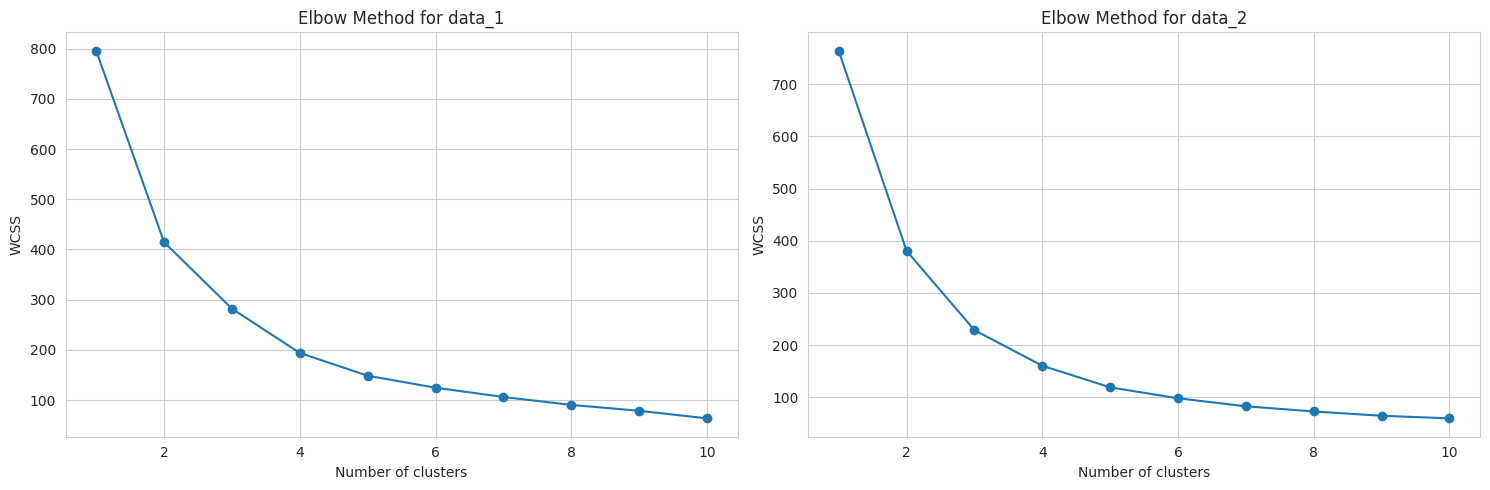

In [65]:
def elbow_method(data, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

elbow_results = {}

for i, data in enumerate(data_list):
    elbow_results[f'data_{i+1}'] = elbow_method(data)


plt.figure(figsize=(15, 5))
for i, (data_name, wcss) in enumerate(elbow_results.items(), 1):
    plt.subplot(1, 2, i)
    plt.plot(range(1, len(wcss) + 1), wcss, marker='o')
    plt.title(f'Elbow Method for {data_name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
plt.tight_layout()
plt.show()


####Метод Локтя
- Data 1 (Euclidean X/Minkowski X): График метода локтя показывает замедление уменьшения WCSS после 2-3 кластеров. Это указывает на то, что оптимальное количество кластеров для этого набора данных может быть 2 или 3.
- Data 2 (Euclidean Y/Minkowski Y): Аналогично, наблюдается замедление после 2-3 кластеров, что также указывает на 2 или 3 как оптимальное количество кластеров.

####Метод Силуэта (Silhouette Method)
Метод силуэта оценивает качество кластеризации, измеряя, насколько одна точка данных похожа на точки в своём кластере по сравнению с точками в других кластерах. Силуэтный коэффициент принимает значения от -1 до +1, где высокое значение указывает на хорошо разделенные кластеры.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

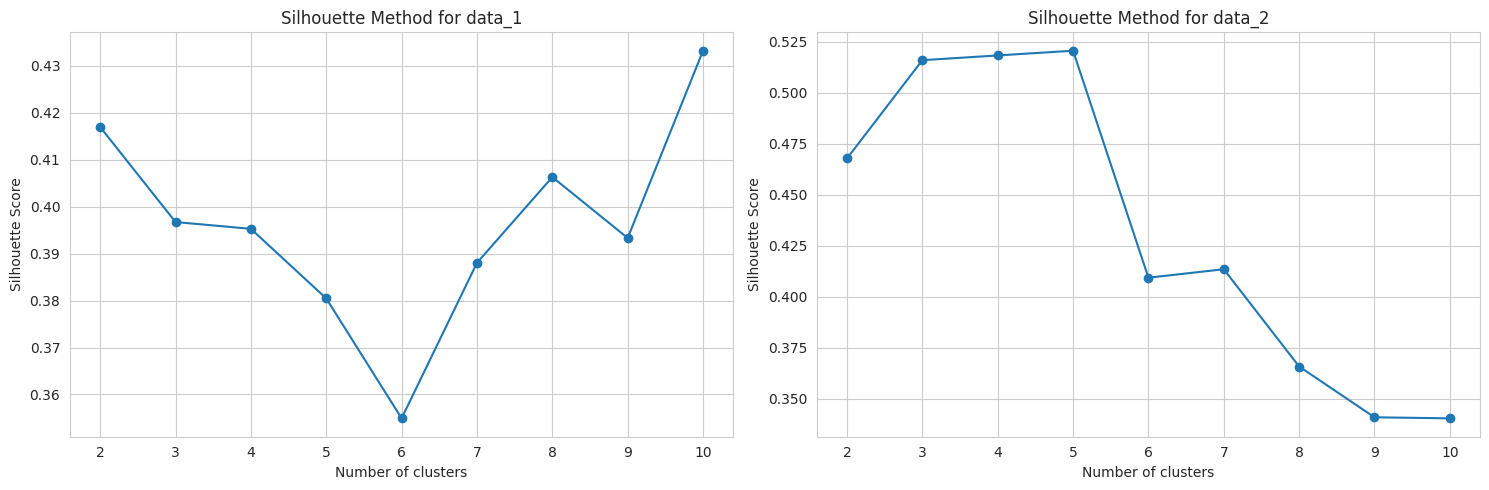

In [66]:
def silhouette_method(data, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        predictions = kmeans.fit_predict(data)
        score = silhouette_score(data, predictions)
        silhouette_scores.append(score)
    return silhouette_scores


silhouette_results = {}

for i, data in enumerate(data_list):
    silhouette_results[f'data_{i+1}'] = silhouette_method(data)


plt.figure(figsize=(15, 5))
for i, (data_name, silhouette_scores) in enumerate(silhouette_results.items(), 1):
    plt.subplot(1, 2, i)
    plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
    plt.title(f'Silhouette Method for {data_name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


####Метод Силуэта
- Data 1 (Euclidean X/Minkowski X): Наилучшие силуэтные оценки наблюдаются при 2/3 или 10 кластерах, что согласуется с результатами метода локтя. Но значение 10 выбивается из предыдущего анализа.
- Data 2 (Euclidean Y/Minkowski Y): Аналогично, высокие силуэтные оценки для 2-5 кластеров подтверждают выводы, полученные методом локтя.



#### BIC (Bayesian Information Criterion)

Критерий BIC часто используется в статистическом моделировании и машинном обучении для выбора оптимальной модели. Он основан на логарифме правдоподобия модели с учетом числа параметров. BIC штрафует модели с большим числом параметров, тем самым предпочитая более простые модели, если они обеспечивают сопоставимую степень соответствия данным.

Для кластеризации BIC обычно используется с Gaussian Mixture Models (GMM). GMM позволяет оценить кластеры, рассматривая данные как смесь нескольких гауссовских распределений.

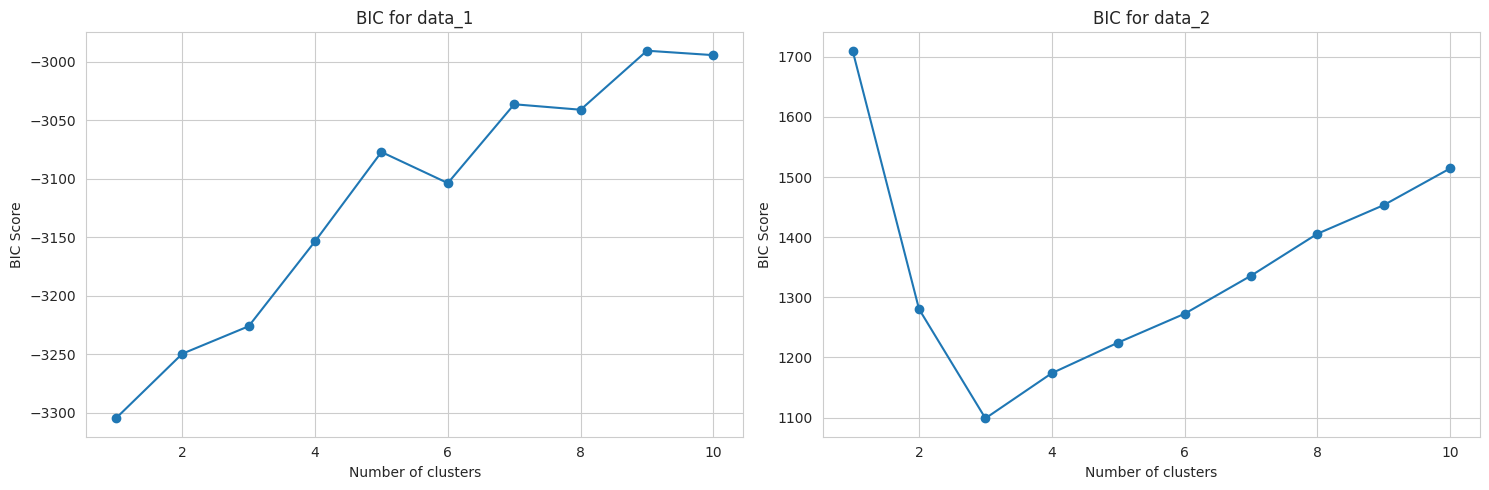

In [67]:
from sklearn.mixture import GaussianMixture

def bic_method(data, max_k=10):
    bic_scores = []
    for k in range(1, max_k + 1):
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        bic_scores.append(gmm.bic(data))
    return bic_scores

bic_results = {}

for i, data in enumerate(data_list):
    bic_results[f'data_{i+1}'] = bic_method(data)

plt.figure(figsize=(15, 5))
for i, (data_name, bic_scores) in enumerate(bic_results.items(), 1):
    plt.subplot(1, 2, i)
    plt.plot(range(1, len(bic_scores) + 1), bic_scores, marker='o')
    plt.title(f'BIC for {data_name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('BIC Score')
plt.tight_layout()
plt.show()


Для данных 1:
График BIC показывает, что после k=1-3 значение BIC начинает резко увеличиваться, что указывает на то, что оптимальное количество кластеров для данного набора данных может быть равно 2-3.

Для данных 2:
График BIC четко указывает на то, что наименьшее значение BIC достигается при k=3, после чего значения BIC стабильно увеличиваются с ростом числа кластеров. Это указывает на то, что 3 кластера являются наиболее предпочтительным вариантом для кластеризации этого набора данных.

####Сравнение с Результатами Пунктов 1.4 и 2.4
- Согласованность с Результатами Кластеризации: Результаты, полученные с помощью методов локтя, силуэта и bic, согласуются с выводами из пунктов 1.4 и 2.4. В обоих случаях было предположено, что 2 или 3 кластера могут быть оптимальными для данных наборов.
- Подтверждение Выбора Кластеров: Эти методы подтверждают, что выбор 2 или 3 кластеров для анализа данных был разумным и соответствовал внутренней структуре данных.

## Метрики

- Предложите (или найдите в литературе) какой-либо другой критерий качества кластеризации
(отличный от модулярности). Сравните разбиения п.1.1 и п.2.1 по этому критерию. Дайте
комментарий, как это согласуется с вашими выводами п.1.4 и п.2.4.

####Индекс Дэвиса-Боулдина (DBI)
Индекс Дэвиса-Боулдина оценивает качество кластеризации, основываясь на внутренней плотности кластеров и их разделении друг от друга. Меньшие значения DBI указывают на лучшее разделение кластеров. Индекс рассчитывается следующим образом:

Для каждого кластера вычисляется среднее расстояние между точками этого кластера и его центроидом.
Для пары кластеров вычисляется сумма средних расстояний для каждого кластера, делённая на расстояние между центроидами этих кластеров.
Для каждого кластера находится максимальное значение этой суммы по сравнению с другими кластерами.
Индекс DBI равен среднему из этих максимальных значений по всем кластерам.

In [68]:
from sklearn.metrics import davies_bouldin_score

def compute_dbi(data, labels):
    return davies_bouldin_score(data, labels)

data = {'euclidean_x': data_x,
        'minkowski_x': data_x,
        'euclidean_y': data_y,
        'minkowski_y': data_y}

predictions = {'euclidean_x': [ward_clustering_euclidean_x, kmeans_clustering_euclidean_x, em_clustering_euclidean_x, spectral_clustering_euclidean_x],
               'minkowski_x': [ward_clustering_minkowski_x, kmeans_clustering_minkowski_x, em_clustering_minkowski_x, spectral_clustering_minkowski_x],
               'euclidean_y': [ward_clustering_euclidean_y, kmeans_clustering_euclidean_y, em_clustering_euclidean_y, spectral_clustering_euclidean_y],
               'minkowski_y': [ward_clustering_minkowski_y, kmeans_clustering_minkowski_y, em_clustering_minkowski_y, spectral_clustering_minkowski_y]}

methods = ['ward', 'kmeans', 'em', 'spectral']

for dist, predictions_list in predictions.items():
    for i, labels in enumerate(predictions_list):
        dbi = compute_dbi(data[dist], labels)
        print('DBI-2 for', dist, 'with', methods[i], 'method:', dbi)

DBI-2 for euclidean_x with ward method: 1.0083148314917212
DBI-2 for euclidean_x with kmeans method: 0.9598797708912175
DBI-2 for euclidean_x with em method: 0.9594601952307619
DBI-2 for euclidean_x with spectral method: 33.52487810884833
DBI-2 for minkowski_x with ward method: 1.0083148314917212
DBI-2 for minkowski_x with kmeans method: 0.9598797708912175
DBI-2 for minkowski_x with em method: 0.9598797708912175
DBI-2 for minkowski_x with spectral method: 33.52487810884833
DBI-2 for euclidean_y with ward method: 0.8434501542471943
DBI-2 for euclidean_y with kmeans method: 0.8434501542471943
DBI-2 for euclidean_y with em method: 0.8434501542471943
DBI-2 for euclidean_y with spectral method: 0.79356556827256
DBI-2 for minkowski_y with ward method: 0.8434501542471943
DBI-2 for minkowski_y with kmeans method: 0.8434501542471943
DBI-2 for minkowski_y with em method: 0.8434501542471943
DBI-2 for minkowski_y with spectral method: 0.79356556827256


#### Набор данных Euclidean X и Minkowski X
- Методы "ward", "kmeans" и "em" показывают сравнительно низкие значения DBI, что указывает на хорошее качество кластеризации. Эти методы обеспечивают более компактные кластеры с хорошим разделением.
- Однако, метод "spectral" показывает значительно более высокое значение DBI, особенно для данных X. Это может указывать на то, что спектральная кластеризация для этих данных дает кластеры с меньшей компактностью или худшим разделением по сравнению с другими методами.

#### Набор данных Euclidean Y и Minkowski Y
- Все методы кластеризации для этих наборов данных показывают более низкие значения DBI, чем для данных X, особенно метод "spectral". Это может свидетельствовать о более четком разделении и компактности кластеров в данных Y.
- Методы "ward", "kmeans" и "em" показывают схожие значения DBI, что указывает на то, что все эти методы действуют сравнительно эффективно для данных Y.

В целом, можно сказать, что для данных Y качество кластеризации оказалось лучше по сравнению с данными X, исходя из показателей DBI. Также стоит отметить, что спектральная кластеризация, хотя и показала высокий DBI для данных X, оказалась более эффективной для данных Y.

In [69]:
from sklearn.metrics import davies_bouldin_score

def compute_dbi(data, labels):
    return davies_bouldin_score(data, labels)

data = {'euclidean_x': data_x,
        'minkowski_x': data_x,
        'euclidean_y': data_y,
        'minkowski_y': data_y}

predictions = {'euclidean_x': [ward_clustering_3_euclidean_x, kmeans_clustering_3_euclidean_x, em_clustering_3_euclidean_x, spectral_clustering_3_euclidean_x],
               'minkowski_x': [ward_clustering_3_minkowski_x, kmeans_clustering_3_minkowski_x, em_clustering_3_minkowski_x, spectral_clustering_3_minkowski_x],
               'euclidean_y': [ward_clustering_3_euclidean_y, kmeans_clustering_3_euclidean_y, em_clustering_3_euclidean_y, spectral_clustering_3_euclidean_y],
               'minkowski_y': [ward_clustering_3_minkowski_y, kmeans_clustering_3_minkowski_y, em_clustering_3_minkowski_y, spectral_clustering_3_minkowski_y]}

methods = ['ward', 'kmeans', 'em', 'spectral']

for dist, predictions_list in predictions.items():
    for i, labels in enumerate(predictions_list):
        dbi = compute_dbi(data[dist], labels)
        print('DBI-3 for', dist, 'with', methods[i], 'method:', dbi)


DBI-3 for euclidean_x with ward method: 0.9057321374067153
DBI-3 for euclidean_x with kmeans method: 1.3597173017881634
DBI-3 for euclidean_x with em method: 0.8810934106149769
DBI-3 for euclidean_x with spectral method: 1.8951771162930848
DBI-3 for minkowski_x with ward method: 0.9057321374067153
DBI-3 for minkowski_x with kmeans method: 0.8522247895807257
DBI-3 for minkowski_x with em method: 0.8417963190447993
DBI-3 for minkowski_x with spectral method: 1.8951771162930848
DBI-3 for euclidean_y with ward method: 0.9070691809902796
DBI-3 for euclidean_y with kmeans method: 0.9070691809902796
DBI-3 for euclidean_y with em method: 0.9070691809902796
DBI-3 for euclidean_y with spectral method: 0.9070691809902796
DBI-3 for minkowski_y with ward method: 0.9070691809902796
DBI-3 for minkowski_y with kmeans method: 0.9070691809902796
DBI-3 for minkowski_y with em method: 0.9070691809902796
DBI-3 for minkowski_y with spectral method: 0.9070691809902796


####Набор данных Euclidean X и Minkowski X
- Методы "ward", "kmeans" и "em" продемонстрировали сравнительно низкие значения DBI для обеих метрик расстояния. Это указывает на более качественное разделение и большую компактность кластеров по сравнению с двухкластерной кластеризацией.
- Среди них, метод "em" показывает самое низкое значение DBI, что может свидетельствовать о его более высокой эффективности в создании четко разграниченных кластеров для данных X.
- Спектральная кластеризация для данных X снова показывает значительно более высокое значение DBI, что может указывать на менее эффективное разделение кластеров по сравнению с другими методами.

#### Набор данных Euclidean Y и Minkowski Y
- Для этих наборов данных значения DBI идентичны для всех методов кластеризации, и они значительно выше, чем для данных X. Это может указывать на то, что кластерная структура данных Y менее ярко выражена или что эти методы кластеризации менее эффективны для данных Y, особенно при разделении на три кластера.

В целом, данные X демонстрируют более четкую кластерную структуру при трёхкластерной кластеризации по сравнению с данными Y. Среди всех методов, "em" выделяется как наиболее эффективный для данных X, в то время как для данных Y все методы показывают схожие и относительно высокие значения DBI, что может указывать на сложность в выявлении четких кластеров в этих данных.

#### ARI почти rand


Индекс Рэнда (Adjusted Rand Index, ARI) — это мера сходства между двумя разбиениями одного и того же набора объектов. ARI корректирует индекс Рэнда с учетом случайности, позволяя сравнивать кластеризации различного размера.

ARI может принимать значения от -1 до 1. Значение 0 указывает на то, что сходство между двумя разбиениями не больше, чем можно было бы ожидать от случайного разбиения. Значения, близкие к 1, указывают на значительное сходство между разбиениями, а значения, близкие к -1, указывают на значительное несоответствие между ними.

Преимущества использования ARI включают:

Случайная Нормализация: ARI учитывает вероятность случайного согласования двух разбиений, что делает его надежным индикатором качества кластеризации.
Независимость от числа и размера кластеров: ARI не зависит от абсолютного числа кластеров, и его можно использовать для сравнения разбиений с разным числом кластеров.
Симметричность: значение ARI одинаково независимо от того, какое разбиение считать предсказанием, а какое — истиной.
ARI особенно полезен, когда известно истинное разбиение объектов на кластеры (например, в симулированных данных или когда есть золотой стандарт), и его можно использовать для оценки того, насколько хорошо алгоритм кластеризации воспроизводит это разбиение.

In [70]:
from sklearn.metrics import adjusted_rand_score

def compute_ari(labels_1, labels_2):
    return adjusted_rand_score(labels_1, labels_2)

predictions = {'euclidean_x': [ward_clustering_euclidean_x, kmeans_clustering_euclidean_x, em_clustering_euclidean_x, spectral_clustering_euclidean_x],
               'minkowski_x': [ward_clustering_minkowski_x, kmeans_clustering_minkowski_x, em_clustering_minkowski_x, spectral_clustering_minkowski_x],
               'euclidean_y': [ward_clustering_euclidean_y, kmeans_clustering_euclidean_y, em_clustering_euclidean_y, spectral_clustering_euclidean_y],
               'minkowski_y': [ward_clustering_minkowski_y, kmeans_clustering_minkowski_y, em_clustering_minkowski_y, spectral_clustering_minkowski_y]}

methods = ['ward', 'kmeans', 'em', 'spectral']

for dist, predicted_labels_list in predictions.items():
    # Сравниваем каждый метод с каждым
    for i in range(len(predicted_labels_list)):
        for j in range(i + 1, len(predicted_labels_list)):
            # Вычисляем ARI для пары предсказаний
            ari = compute_ari(predicted_labels_list[i], predicted_labels_list[j])
            print(f'ARI-2 between {methods[i]} and {methods[j]} for {dist}:', ari)


ARI-2 between ward and kmeans for euclidean_x: 0.7198202142144297
ARI-2 between ward and em for euclidean_x: 0.68592375042907
ARI-2 between ward and spectral for euclidean_x: -0.005784584470385146
ARI-2 between kmeans and em for euclidean_x: 0.9600017289209614
ARI-2 between kmeans and spectral for euclidean_x: 0.004202820878691878
ARI-2 between em and spectral for euclidean_x: 0.0008361405872297972
ARI-2 between ward and kmeans for minkowski_x: 0.7198202142144297
ARI-2 between ward and em for minkowski_x: 0.7198202142144297
ARI-2 between ward and spectral for minkowski_x: -0.005784584470385146
ARI-2 between kmeans and em for minkowski_x: 1.0
ARI-2 between kmeans and spectral for minkowski_x: 0.004202820878691878
ARI-2 between em and spectral for minkowski_x: 0.004202820878691878
ARI-2 between ward and kmeans for euclidean_y: 1.0
ARI-2 between ward and em for euclidean_y: 1.0
ARI-2 between ward and spectral for euclidean_y: 0.21100552029940978
ARI-2 between kmeans and em for euclidean_y

In [71]:
from sklearn.metrics import adjusted_rand_score

def compute_ari(labels_1, labels_2):
    return adjusted_rand_score(labels_1, labels_2)

predictions = {'euclidean_x': [ward_clustering_3_euclidean_x, kmeans_clustering_3_euclidean_x, em_clustering_3_euclidean_x, spectral_clustering_3_euclidean_x],
               'minkowski_x': [ward_clustering_3_minkowski_x, kmeans_clustering_3_minkowski_x, em_clustering_3_minkowski_x, spectral_clustering_3_minkowski_x],
               'euclidean_y': [ward_clustering_3_euclidean_y, kmeans_clustering_3_euclidean_y, em_clustering_3_euclidean_y, spectral_clustering_3_euclidean_y],
               'minkowski_y': [ward_clustering_3_minkowski_y, kmeans_clustering_3_minkowski_y, em_clustering_3_minkowski_y, spectral_clustering_3_minkowski_y]}

methods = ['ward', 'kmeans', 'em', 'spectral']

for dist, predicted_labels_list in predictions.items():
    # Сравниваем каждый метод с каждым
    for i in range(len(predicted_labels_list)):
        for j in range(i + 1, len(predicted_labels_list)):
            # Вычисляем ARI для пары предсказаний
            ari = compute_ari(predicted_labels_list[i], predicted_labels_list[j])
            print(f'ARI-3 between {methods[i]} and {methods[j]} for {dist}:', ari)


ARI-3 between ward and kmeans for euclidean_x: 0.33989994461947487
ARI-3 between ward and em for euclidean_x: 0.43262914521916823
ARI-3 between ward and spectral for euclidean_x: 0.28618222301397933
ARI-3 between kmeans and em for euclidean_x: 0.5462898273864785
ARI-3 between kmeans and spectral for euclidean_x: 0.3356132767680812
ARI-3 between em and spectral for euclidean_x: 0.21745353490418787
ARI-3 between ward and kmeans for minkowski_x: 0.3464090202295694
ARI-3 between ward and em for minkowski_x: 0.37820515211410094
ARI-3 between ward and spectral for minkowski_x: 0.28618222301397933
ARI-3 between kmeans and em for minkowski_x: 0.7956552393230976
ARI-3 between kmeans and spectral for minkowski_x: 0.1587039684204922
ARI-3 between em and spectral for minkowski_x: 0.15359025998324177
ARI-3 between ward and kmeans for euclidean_y: 1.0
ARI-3 between ward and em for euclidean_y: 1.0
ARI-3 between ward and spectral for euclidean_y: 1.0
ARI-3 between kmeans and em for euclidean_y: 1.0
A

#### Silhouette score


Индекс силуэта (Silhouette Score) — это метрика, используемая для оценки качества кластеризации. Индекс силуэта измеряет, насколько хорошо каждый объект был сгруппирован с другими объектами в своем кластере, которое основано на двух факторах:

Как близко объекты в одном кластере друг к другу (сгущенность).
Как далеко объекты в одном кластере от объектов других кластеров (разделение).
Значение индекса силуэта варьируется от -1 до 1, где:

Значение 1 означает, что объекты очень близко сгруппированы внутри кластера и находятся далеко от объектов других кластеров.
Значение 0 указывает на перекрывающиеся кластеры с нечеткими границами.
Значение -1 означает, что объекты были неправильно сгруппированы.
Чем выше индекс силуэта, тем лучше кластеры определены. Если средний индекс силуэта близок к 1, это свидетельствует о том, что кластеры явно разграничены и плотно сгруппированы. Если средний индекс силуэта близок к -1, это свидетельствует о том, что многие точки данных могли быть неправильно сгруппированы.

Для вычисления индекса силуэта для набора данных используется следующая формула:
s(i)= b(i)−a(i) / max{a(i),b(i)}

где:
a(i) — среднее расстояние от i-го объекта до других объектов в том же кластере.
b(i) — минимальное среднее расстояние от i-го объекта до объектов в другом кластере, не включая его собственный кластер.

In [72]:
from sklearn.metrics import silhouette_score

data = {'euclidean_x': data_x,
        'minkowski_x': data_x,
        'euclidean_y': data_y,
        'minkowski_y': data_y}

predictions = {'euclidean_x': [ward_clustering_euclidean_x, kmeans_clustering_euclidean_x, em_clustering_euclidean_x, spectral_clustering_euclidean_x],
               'minkowski_x': [ward_clustering_minkowski_x, kmeans_clustering_minkowski_x, em_clustering_minkowski_x, spectral_clustering_minkowski_x],
               'euclidean_y': [ward_clustering_euclidean_y, kmeans_clustering_euclidean_y, em_clustering_euclidean_y, spectral_clustering_euclidean_y],
               'minkowski_y': [ward_clustering_minkowski_y, kmeans_clustering_minkowski_y, em_clustering_minkowski_y, spectral_clustering_minkowski_y]}

methods = ['ward', 'kmeans', 'em', 'spectral']

for dist, predictions_list in predictions.items():
    data_for_clustering = data_x if 'x' in dist else data_y

    for i, labels in enumerate(predictions_list):
        silhouette_avg = silhouette_score(data_for_clustering, labels)
        print('Silhouette Score 2 for', dist, 'with', methods[i], 'method:', silhouette_avg)

Silhouette Score 2 for euclidean_x with ward method: 0.39022564623494504
Silhouette Score 2 for euclidean_x with kmeans method: 0.417530287166068
Silhouette Score 2 for euclidean_x with em method: 0.4169600149559683
Silhouette Score 2 for euclidean_x with spectral method: 0.042385099887428904
Silhouette Score 2 for minkowski_x with ward method: 0.39022564623494504
Silhouette Score 2 for minkowski_x with kmeans method: 0.417530287166068
Silhouette Score 2 for minkowski_x with em method: 0.417530287166068
Silhouette Score 2 for minkowski_x with spectral method: 0.042385099887428904
Silhouette Score 2 for euclidean_y with ward method: 0.4677854512012639
Silhouette Score 2 for euclidean_y with kmeans method: 0.4677854512012639
Silhouette Score 2 for euclidean_y with em method: 0.4677854512012639
Silhouette Score 2 for euclidean_y with spectral method: 0.4736946818082028
Silhouette Score 2 for minkowski_y with ward method: 0.4677854512012639
Silhouette Score 2 for minkowski_y with kmeans me

In [73]:
from sklearn.metrics import silhouette_score

data = {'euclidean_x': data_x,
        'minkowski_x': data_x,
        'euclidean_y': data_y,
        'minkowski_y': data_y}

predictions = {'euclidean_x': [ward_clustering_3_euclidean_x, kmeans_clustering_3_euclidean_x, em_clustering_3_euclidean_x, spectral_clustering_3_euclidean_x],
               'minkowski_x': [ward_clustering_3_minkowski_x, kmeans_clustering_3_minkowski_x, em_clustering_3_minkowski_x, spectral_clustering_3_minkowski_x],
               'euclidean_y': [ward_clustering_3_euclidean_y, kmeans_clustering_3_euclidean_y, em_clustering_3_euclidean_y, spectral_clustering_3_euclidean_y],
               'minkowski_y': [ward_clustering_3_minkowski_y, kmeans_clustering_3_minkowski_y, em_clustering_3_minkowski_y, spectral_clustering_3_minkowski_y]}

methods = ['ward', 'kmeans', 'em', 'spectral']

for dist, predictions_list in predictions.items():
    data_for_clustering = data_x if 'x' in dist else data_y

    for i, labels in enumerate(predictions_list):
        silhouette_avg = silhouette_score(data_for_clustering, labels)
        print('Silhouette Score 3 for', dist, 'with', methods[i], 'method:', silhouette_avg)


Silhouette Score 3 for euclidean_x with ward method: 0.35500724327176153
Silhouette Score 3 for euclidean_x with kmeans method: 0.2984591612395641
Silhouette Score 3 for euclidean_x with em method: 0.388346011281758
Silhouette Score 3 for euclidean_x with spectral method: 0.17288275577279655
Silhouette Score 3 for minkowski_x with ward method: 0.35500724327176153
Silhouette Score 3 for minkowski_x with kmeans method: 0.3921138308443714
Silhouette Score 3 for minkowski_x with em method: 0.38836899330424024
Silhouette Score 3 for minkowski_x with spectral method: 0.17288275577279655
Silhouette Score 3 for euclidean_y with ward method: 0.5159811962139784
Silhouette Score 3 for euclidean_y with kmeans method: 0.5159811962139784
Silhouette Score 3 for euclidean_y with em method: 0.5159811962139784
Silhouette Score 3 for euclidean_y with spectral method: 0.5159811962139784
Silhouette Score 3 for minkowski_y with ward method: 0.5159811962139784
Silhouette Score 3 for minkowski_y with kmeans m